# Random Walk

Play with different thoughts to generate random walks

## Classic Random Walk

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def get_normal_random_walk(steps: int) -> np.array:
    """Create plotting numbers for a normal random walk.

    Parameters
    ----------
    steps : int
        Amount of steps for the random walk.

    Returns
    -------
    np.array
        Array with 'steps' items.
    """
    tic_num = 0
    random_walk = np.random.rand(steps,1)
    # using the funcion np.nditer which iterates and is able to change values
    for value in np.nditer(random_walk, op_flags=['readwrite']):
        if value <= 0.5:
            tic_num -= 1
            value[...] = tic_num
        else:
            tic_num += 1
            value[...] = tic_num
    return random_walk

In [3]:
# Print n random walks
def print_normal_random_walks(amount: int, steps: int):
    """Print an amount of n ranodm walks in one plot.

    Parameters
    ----------
    amount : int
        Amount of random walks.
    steps : int
        Steps in random walk.
    """
    fig, ax = plt.subplots(figsize=(30,10))
    for i in range(amount):
        ax.plot(get_normal_random_walk(steps))
    plt.show()

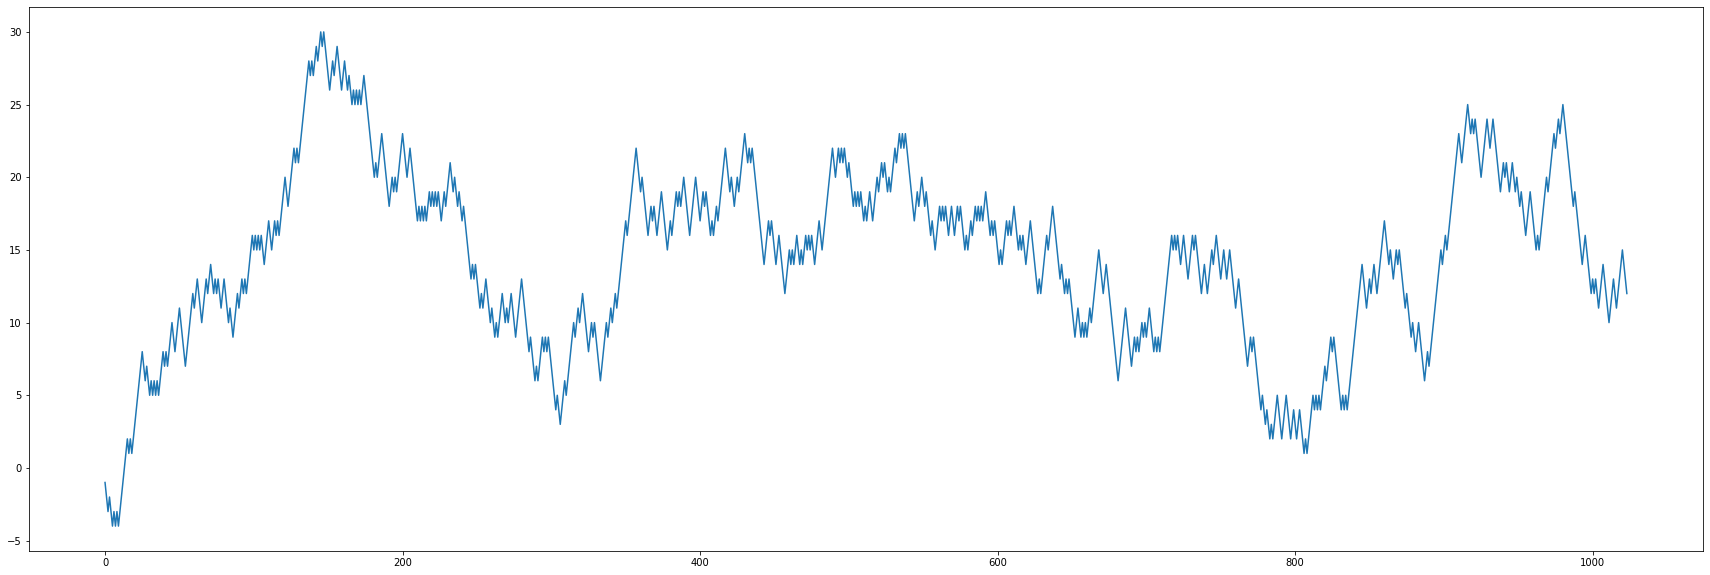

In [4]:
print_normal_random_walks(1, 1024)

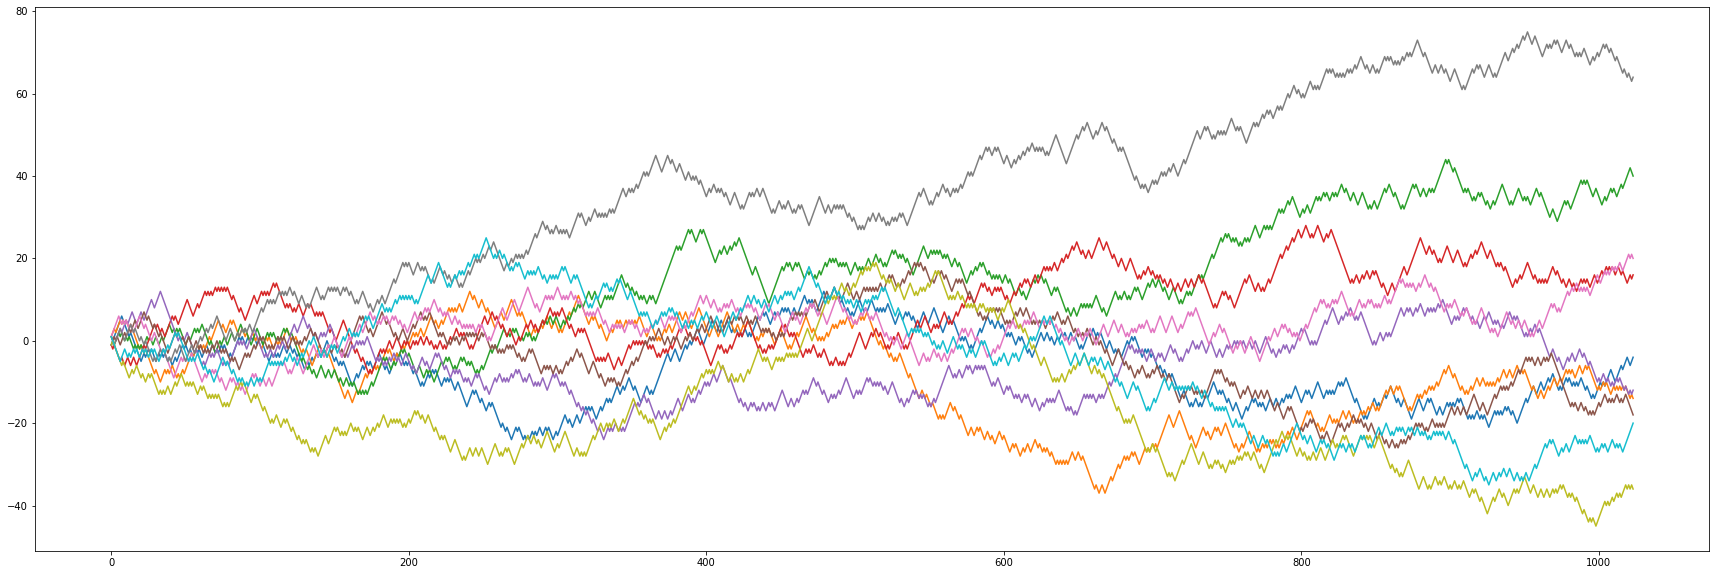

In [5]:
print_normal_random_walks(10, 1024)

## Simulated Quantum Random Walk

In [6]:
from qiskit import QuantumCircuit, Aer, transpile

In [7]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)

In [8]:
# Set up simulation
simulator = Aer.get_backend('aer_simulator')
qc_compiled = transpile(qc, simulator)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [9]:
def get_quantum_random_walk(shots: int) -> np.array:
    """Create plotting numbers for a normal random walk.

    Parameters
    ----------
    shots : int
        Amount of shots for repeated measurements of the quantum circuit.

    Returns
    -------
    np.array
        Array with 'shots' items.
    """
    tic_num = 0
    result = simulator.run(qc_compiled, shots=shots, memory=True).result()
    np_result = result.get_memory(qc)
    quantum_array = np.copy(np_result)
    # The arary from np_result has values with dtype U1 that is U = String with length = 1
    # We must transform strings into int
    quantum_array = quantum_array.astype(np.int32)
    # using the funcion np.nditer which iterates and is able to change values
    for value in np.nditer(quantum_array, op_flags=['readwrite']):
        if value == 0:
            tic_num -= 1
            value[...] = tic_num
        else:
            tic_num += 1
            value[...] = tic_num
    return quantum_array

In [10]:
# Print n random walks
def print_quantum_random_walks(amount: int, steps: int):
    """Print an amount of n random walks in one plot.

    Parameters
    ----------
    amount : int
        Amount of random walks.
    steps : int
        Amount of steps in a random walk.
    """
    fig, ax = plt.subplots(figsize=(30,10))
    for i in range(amount):
        ax.plot(get_quantum_random_walk(steps))
    plt.show()

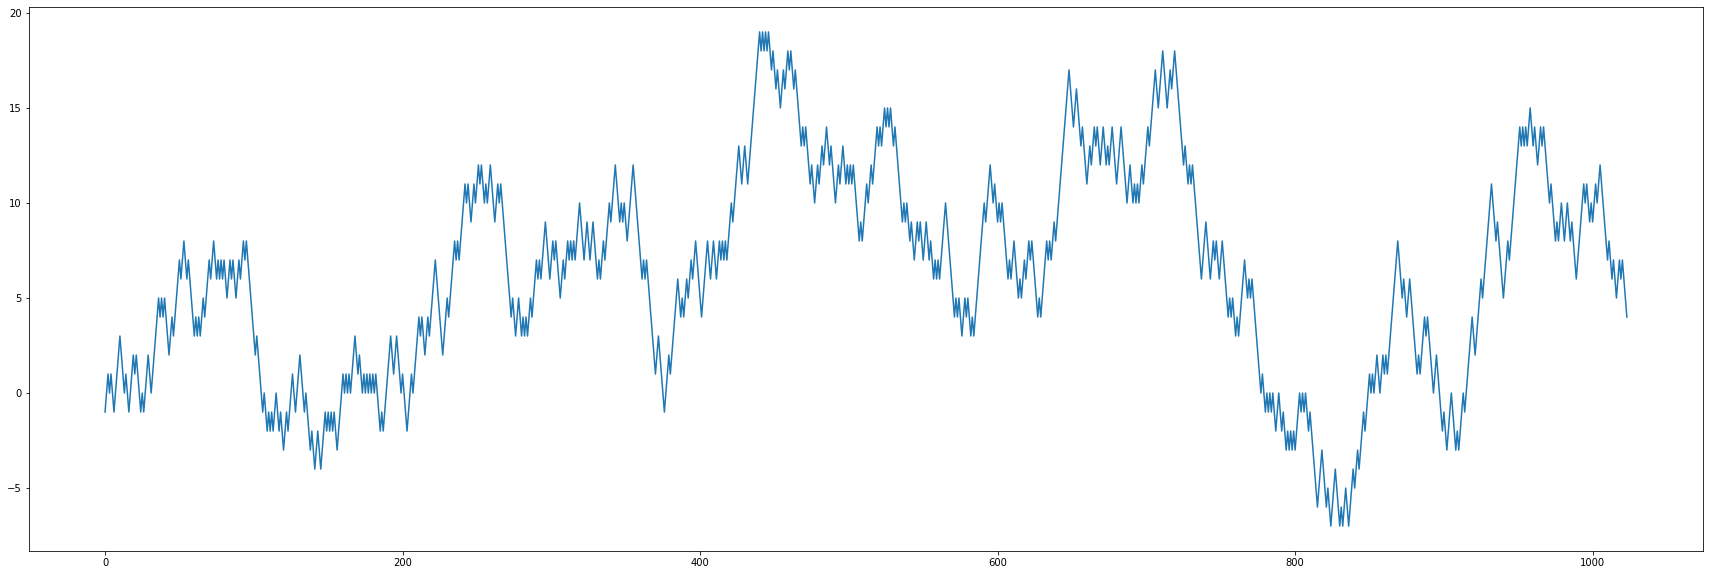

In [11]:
print_quantum_random_walks(1, 1024)

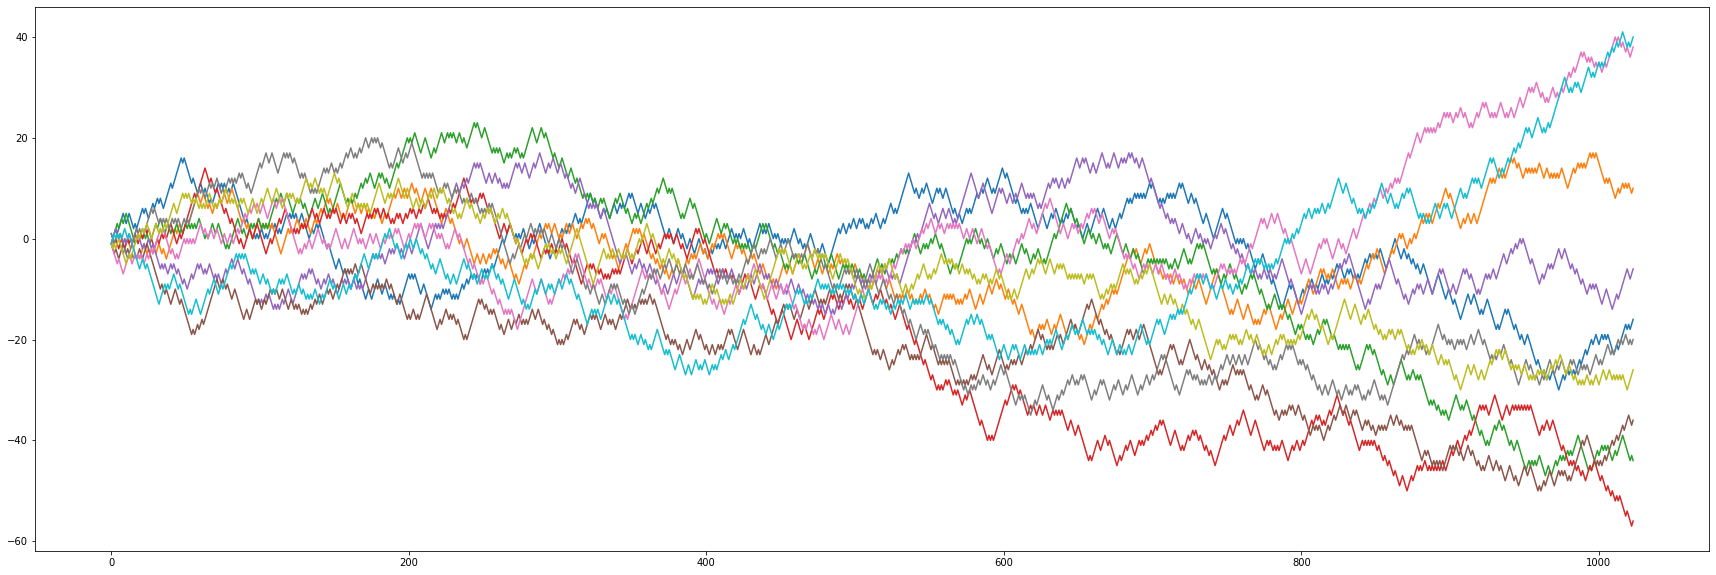

In [12]:
print_quantum_random_walks(10, 1024)

## Pi for random walk

## Idea
Get the first 1024 digits of pi and try 2 different approaches.  
1. all even digits +1 and all odd digits -1
2. all digits < 5 (0,1,2,3,4) and all digits > 5 (5,6,7,8,9)

In [13]:
# Source: github user - deeplook/pi_digits.py -- https://gist.github.com/deeplook/4947835
def pi_digits(x: int) -> int:
    """Generate pi without dezimal point.

    Parameters
    ----------
    x : int
        Number of digits.

    Yields
    ------
    int
        Digit of pi.
    """
    k,a,b,a1,b1 = 2,4,1,12,4
    while x > 0:
        p,q,k = k * k, 2 * k + 1, k + 1
        a,b,a1,b1 = a1, b1, p*a + q*a1, p*b + q*b1
        d,d1 = a/b, a1/b1
        while d == d1 and x > 0:
            yield int(d)
            x -= 1
            a,a1 = 10*(a % b), 10*(a1 % b1)
            d,d1 = a/b, a1/b1

In [14]:
def get_pi_array(digits: int) -> np.ndarray:
    return np.asarray([n for n in list(pi_digits(digits))])

### Pi for random walk - even/odd digits (approach 1)

In [15]:
def get_pi_evenodd_walk(digits: int) -> np.ndarray:
    """Get an even-odd random walk array for printing.

    Parameters
    ----------
    digits : int
        Steps for the random walk.

    Returns
    -------
    np.ndarray
        Transformed steps ready to print.
    """
    pi_for_evenodd = get_pi_array(digits)
    tic_num = 0
    # using the funcion np.nditer which iterates and is able to change values
    for digit in np.nditer(pi_for_evenodd, op_flags=['readwrite']):
        if (digit % 2) == 0:
            tic_num -= 1
            digit[...] = tic_num
        else:
            tic_num += 1
            digit[...] = tic_num
    return pi_for_evenodd

In [16]:
# Print n random walks
def print_pi_evenodd_random_walks(steps: int):
    """Print an amount of n random walks in one plot.
    
    Parameters
    ----------
    amount : int
        Amount of random walks.
    """
    fig, ax = plt.subplots(figsize=(30,10))
    ax.plot(get_pi_evenodd_walk(steps))
    plt.show()

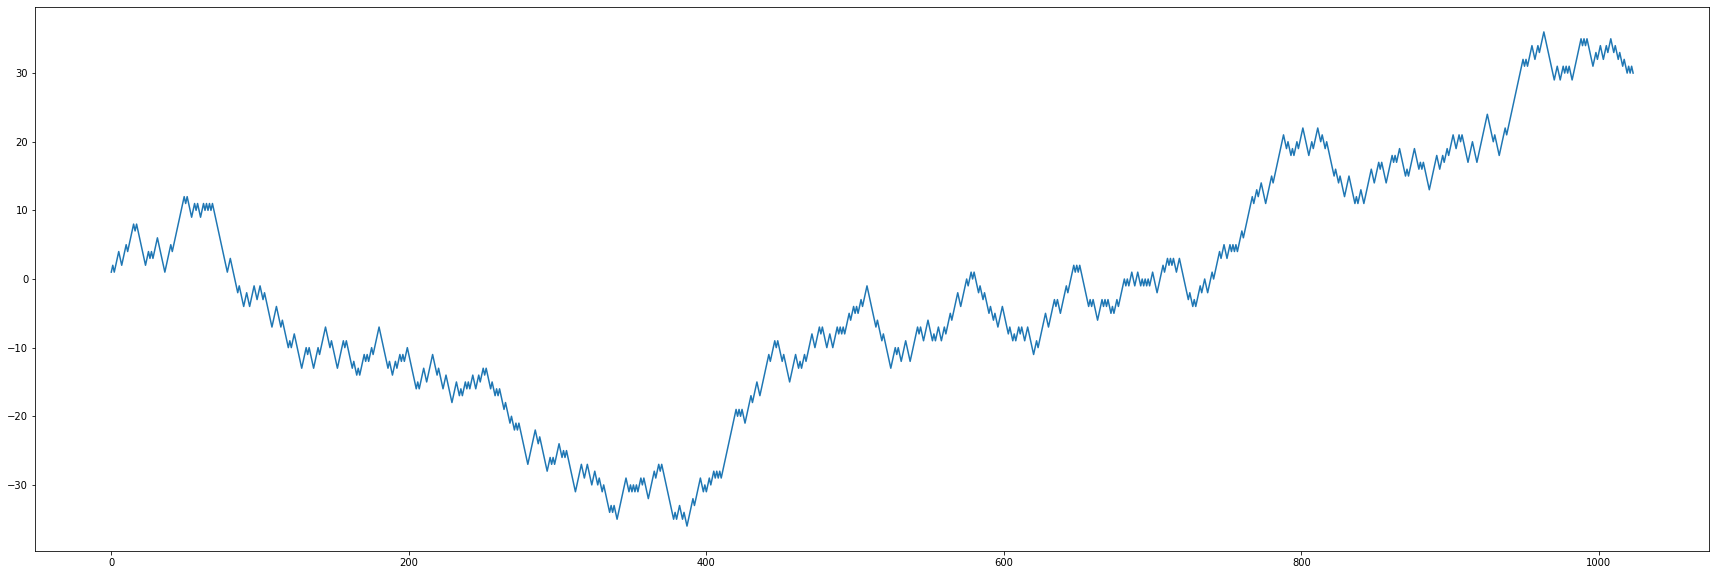

In [17]:
print_pi_evenodd_random_walks(1024)

### Pi for random walk - smaller/greater digits (approach 2)

In [18]:
def get_pi_smallergreater_walk(digits: int):
    """Get an smaller-greater random walk array for printing.

    Parameters
    ----------
    digits : int
        Steps for the random walk.

    Returns
    -------
    np.ndarray
        Transformed steps ready to print.
    """
    pi_for_smallergreater = get_pi_array(digits)
    tic_num = 0
    # using the funcion np.nditer which iterates and is able to change values
    for digit in np.nditer(pi_for_smallergreater, op_flags=['readwrite']):
        if digit < 5:
            tic_num -= 1
            digit[...] = tic_num
        else:
            tic_num += 1
            digit[...] = tic_num
    return pi_for_smallergreater

In [19]:
# Print n random walks
def print_pi_smallergreater_random_walks(steps: int):
    """Print an amount of n random walks in one plot.
    
    Parameters
    ----------
    amount : int
        Amount of random walks.
    """
    fig, ax = plt.subplots(figsize=(30,10))
    ax.plot(get_pi_smallergreater_walk(steps))
    plt.show()

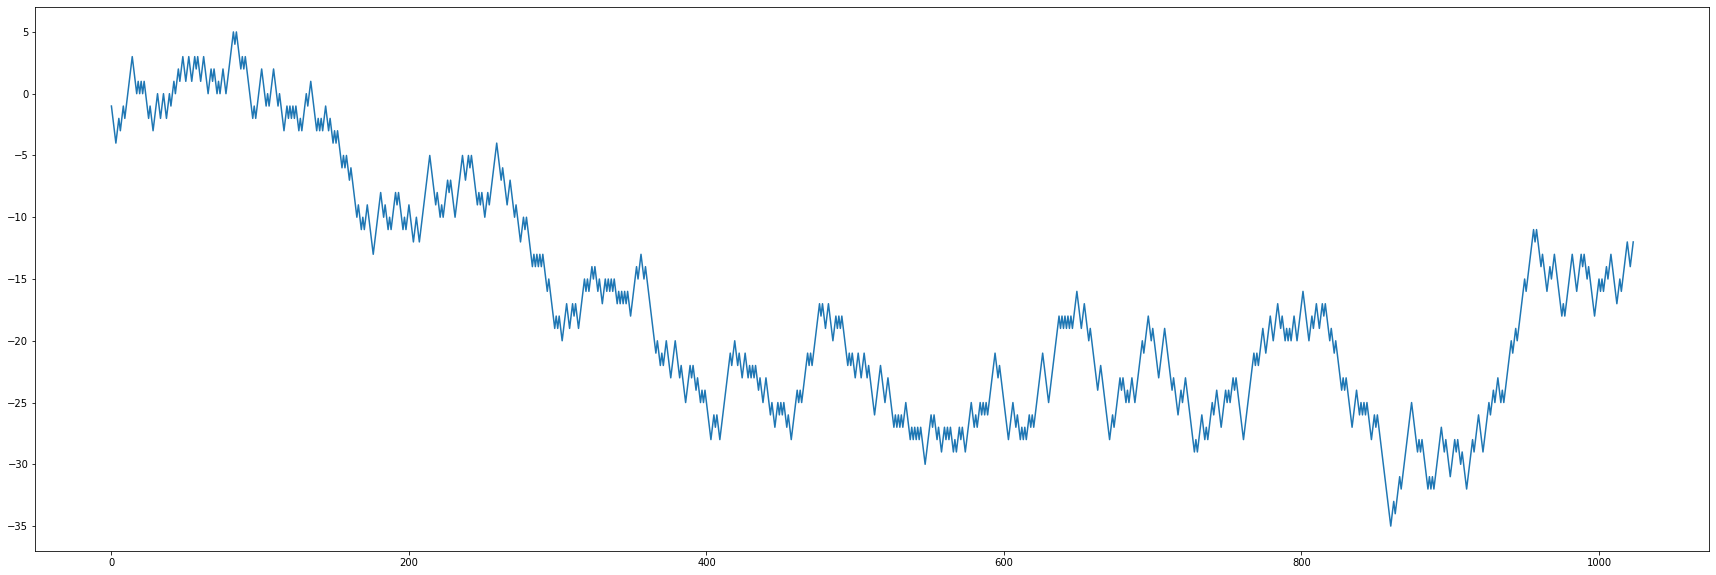

In [20]:
print_pi_smallergreater_random_walks(1024)

## Prime Numbers for random walk

## Idea
Get the first 1024 prime numbers (greater than 10) and try different approaches.
1. permutation: (1,9) and (3,7), (1,3) and (7,9), (1,7) and (3,9)
2. all odd numbers (except multiple of 5) if prime or not prime
3. {three dimensional for each last digit (1, 3, 7, 9)}

In [21]:
# Source: https://geekflare.com/prime-number-in-python/ 
def is_prime(n: int) -> bool:
  """Test if number is prime.

  Parameters
  ----------
  n : int
      Number to be tested.

  Returns
  -------
  bool
      True if prime.
  """
  for i in range(2,n):
    if (n%i) == 0:
      return False
  return True

def get_primes_larger10(n):
    primes = []
    a = 10
    while len(primes) < n:
        if is_prime(a):
            primes.append(a)
        a += 1
    return np.asarray(primes)

### Permutation: (1,9) and (3,7), (1,3) and (7,9), (1,7) and (3,9) (approach 1)

In [22]:
def get_prime_walk(digits: int, value: int) -> np.ndarray:
    """Create a prime number random walk with permutation between odd numbers.

    Parameters
    ----------
    digits : int
        Amount of steps for the random walk.
    value : int
        Second odd number that is combined with 1.

    Returns
    -------
    np.ndarray
        Random walk ready to print.
    """
    prime_array = get_primes_larger10(digits)
    tic_num = 0
    # using the funcion np.nditer which iterates and is able to change values
    for num in np.nditer(prime_array, op_flags=['readwrite']):
        if (num % 10 == 1) or (num % 10 == value):
            tic_num -= 1
            num[...] = tic_num
        else:
            tic_num += 1
            num[...] = tic_num
    return prime_array

In [23]:
# Print n random walks
def print_prime_random_walks(steps: int, value: int):
    """Print an amount of n random walks in one plot.
    
    Parameters
    ----------
    steps : int
        Amount of steps.
    value : int
        Second odd number that is combined with 1.
    """
    fig, ax = plt.subplots(figsize=(30,10))
    ax.plot(get_prime_walk(steps, value))
    plt.show()

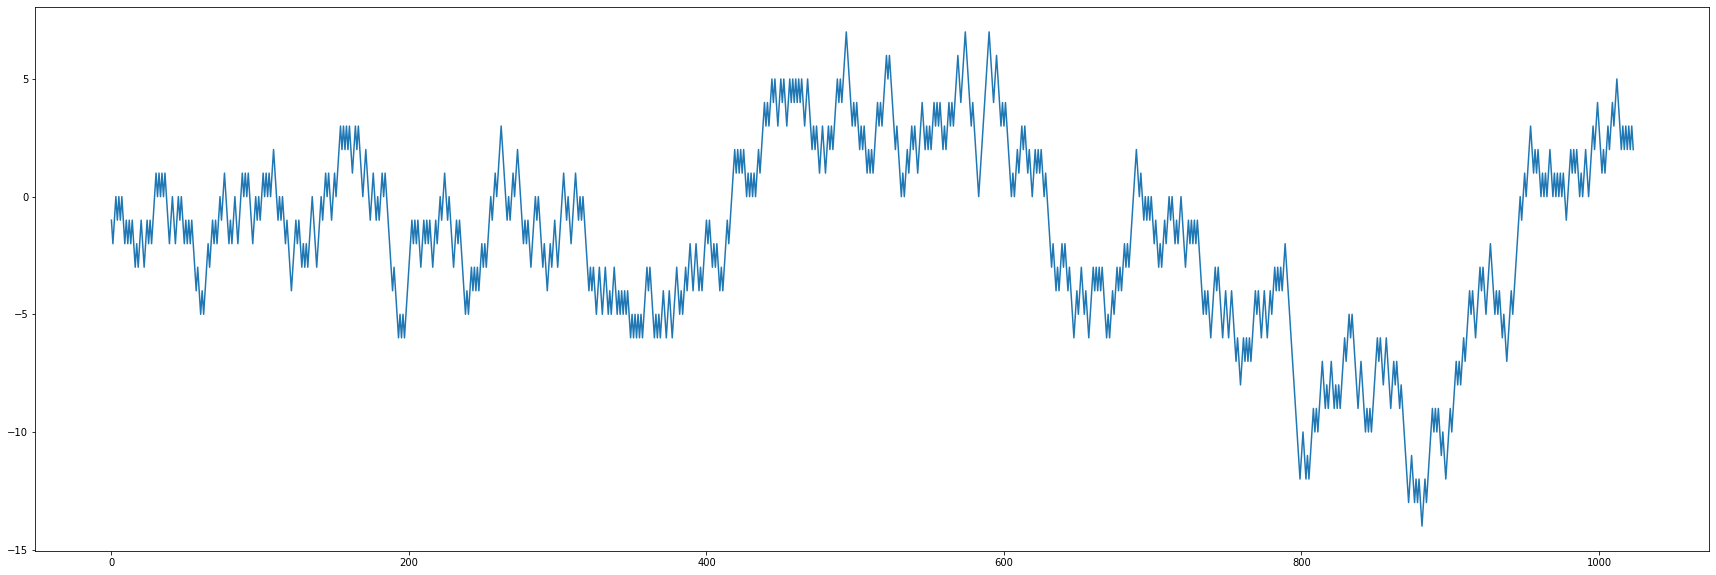

In [24]:
print_prime_random_walks(1024, 3)

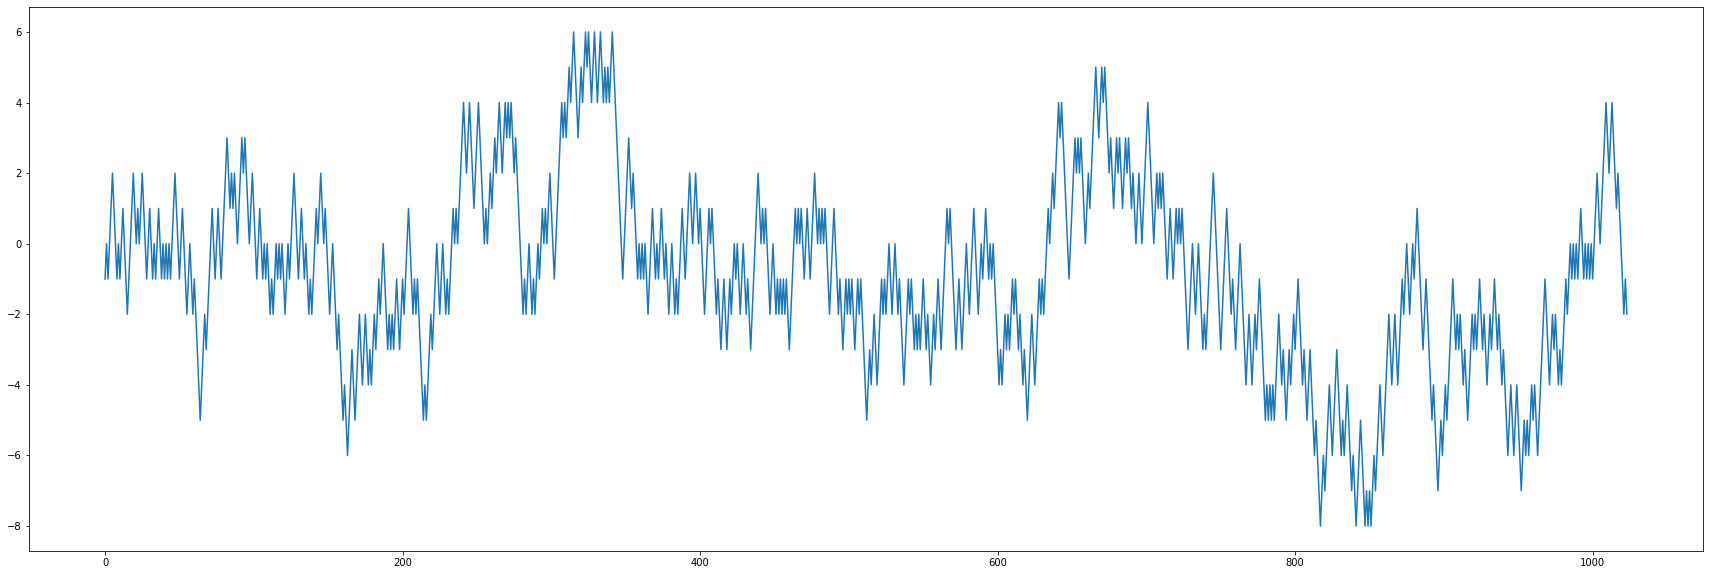

In [35]:
print_prime_random_walks(1024, 7)

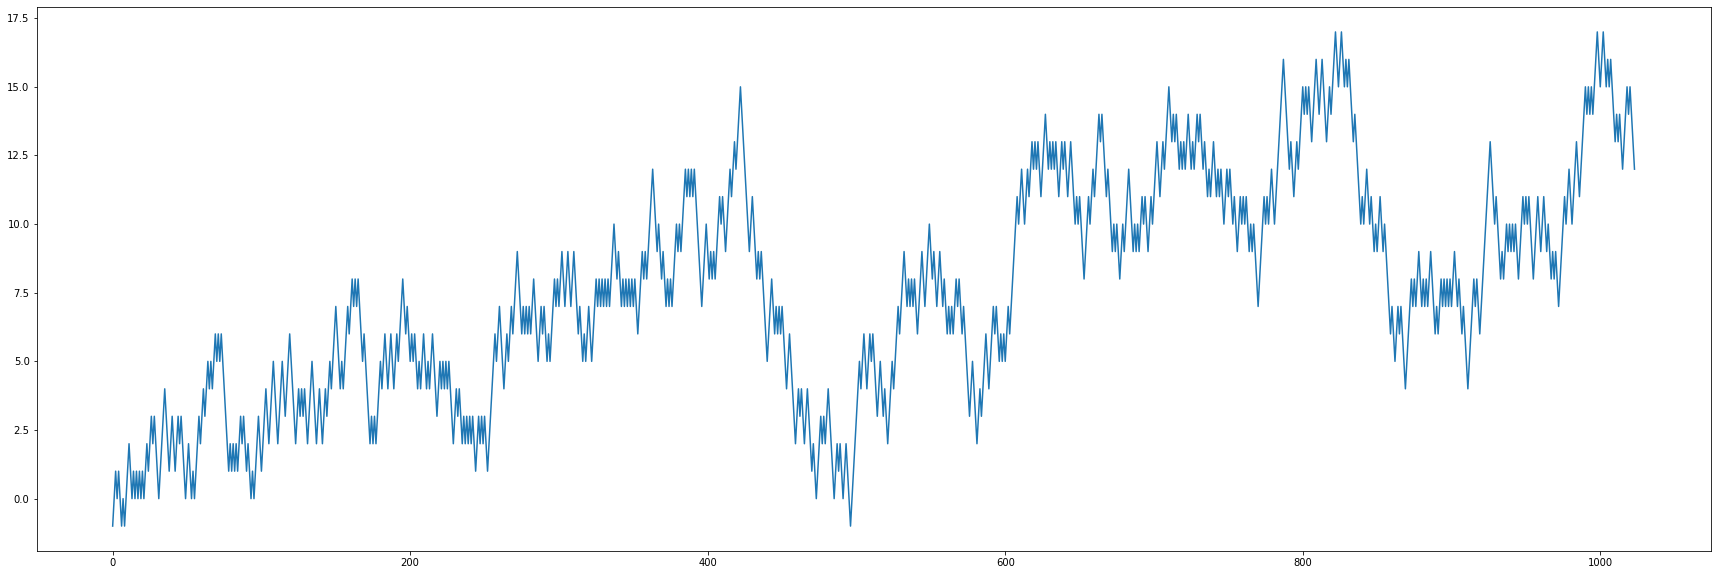

In [26]:
print_prime_random_walks(1024, 9)

### All odd numbers (except multiple of 5) if prime or not prime (approach 2)

In [27]:
def get_odd_numbers_without5multy_above10(amount: int) -> list:
    """Create list with 'amount' of odd numbers without multiples of 5 and above 10.

    Parameters
    ----------
    amount : int
        Amount of wanted odd numbers.

    Returns
    -------
    list
        Amount of odd numbers.
    """
    odd_numbers = []
    a = 11
    while len(odd_numbers) < amount:
        if a % 5 != 0:
            odd_numbers.append(a)
        a += 2
    return odd_numbers

In [31]:
def get_oddprime_walk(steps: int) -> np.ndarray:
    """Create odd prime random walk.

    Parameters
    ----------
    steps : int
        Amount of steps for random walk.

    Returns
    -------
    np.ndarray
        Random walk ready to print.
    """
    odd_array = get_odd_numbers_without5multy_above10(steps)
    prime_array = get_primes_larger10(steps)
    oddprime_list = []
    tic_num = 0
    # using the funcion np.nditer which iterates and is able to change values
    for num in odd_array:
        if num in prime_array:
            tic_num -= 1
            oddprime_list.append(tic_num)
        else:
            tic_num += 1
            oddprime_list.append(tic_num)
    return np.asarray(oddprime_list)

In [32]:
# Print n random walks
def print_oddprime_random_walks(steps: int):
    """Print odd prime random walk.
    
    Parameters
    ----------
    steps : int
        Amount of steps for random walks.
    """
    fig, ax = plt.subplots(figsize=(30,10))
    ax.plot(get_oddprime_walk(steps))
    plt.show()

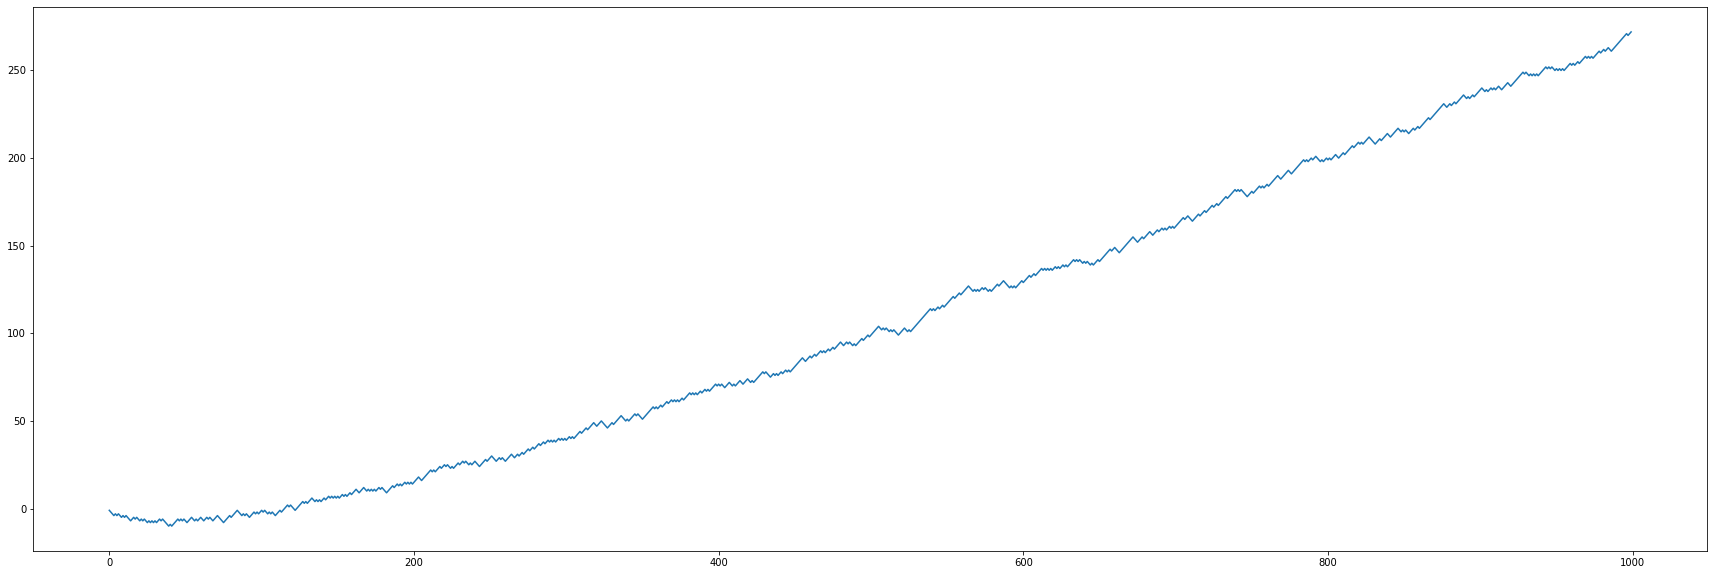

In [37]:
print_oddprime_random_walks(1000)